In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [48]:
data=pd.read_csv(r"C:\Users\amaya\Downloads\global-data-on-sustainable-energy (1).csv")
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [5]:
data.drop(['Density\\n(P/Km2)'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [42]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [7]:
data.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,652230.0,33.93911,67.709953


In [44]:
data.tail(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
3639,Zimbabwe,2011,36.900000,30.1,66.20,1080000.0,79.27,3.43,0.0,5.51,61.633114,3860.7898,11.77,11409.99985,NaN,14.193913,1093.653409,390757.0,-19.015438,29.154857
3640,Zimbabwe,2012,44.000000,29.8,65.14,NaN,77.50,3.25,0.0,5.68,63.605820,4106.9497,10.42,12010.00023,NaN,16.665429,1304.968011,390757.0,-19.015438,29.154857
3641,Zimbabwe,2013,40.498375,29.8,64.44,319000000.0,78.87,3.90,0.0,5.36,57.883370,4085.3320,10.48,12279.99973,NaN,1.989493,1429.998461,390757.0,-19.015438,29.154857
3642,Zimbabwe,2014,32.300000,29.5,63.38,17830000.0,80.27,3.92,0.0,5.79,59.629250,3940.8862,10.40,12079.99992,NaN,2.376929,1434.896277,390757.0,-19.015438,29.154857
3643,Zimbabwe,2015,33.700000,29.5,63.54,NaN,80.82,4.02,0.0,5.37,57.188496,3860.9202,10.36,12430.00031,NaN,1.779873,1445.069702,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,NaN,0.755869,1464.588957,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,NaN,4.709492,1235.189032,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,NaN,4.824211,1254.642265,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,NaN,-6.144236,1316.740657,390757.0,-19.015438,29.154857
3648,Zimbabwe,2020,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,55.204216,2680.1318,10.00,NaN,NaN,-6.248748,1214.509820,390757.0,-19.015438,29.154857


In [8]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [46]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Length: 3649, dtype: bool

In [9]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [48]:
data.shape

(3649, 20)

In [10]:
data.ndim

2

In [50]:
data.size

72980

LABEL ENCODING

In [49]:
le1=LabelEncoder()
data["Entity"]=le1.fit_transform(data['Entity'])
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,0,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,0,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,0,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,0,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,0,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,175,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,175,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,175,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,175,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


CHECKING NULL VALUES

In [52]:
data.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

TREATING NULL VALUES

In [12]:
data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].mean(),inplace=True)
data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].mean(),inplace=True)
data['Renewable-electricity-generating-capacity-per-capita'].fillna(data['Renewable-electricity-generating-capacity-per-capita'].mean(),inplace=True)
data['Financial flows to developing countries (US $)'].fillna(data['Financial flows to developing countries (US $)'].mean(),inplace=True)
data['Renewable energy share in the total final energy consumption (%)'].fillna(data['Renewable energy share in the total final energy consumption (%)'].mean(),inplace=True)
data['Electricity from fossil fuels (TWh)'].fillna(data['Electricity from fossil fuels (TWh)'].mean(),inplace=True)
data['Electricity from nuclear (TWh)'].fillna(data['Electricity from nuclear (TWh)'].mean(),inplace=True)
data['Electricity from renewables (TWh)'].fillna(data['Electricity from renewables (TWh)'].mean(),inplace=True)
data['Low-carbon electricity (% electricity)'].fillna(data['Low-carbon electricity (% electricity)'].mean(),inplace=True)
data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean(),inplace=True)
data['Value_co2_emissions_kt_by_country'].fillna(data['Value_co2_emissions_kt_by_country'].mean(),inplace=True)
data['Renewables (% equivalent primary energy)'].fillna(data['Renewables (% equivalent primary energy)'].mean(),inplace=True)
data['gdp_growth'].fillna(data['gdp_growth'].mean(),inplace=True)
data['gdp_per_capita'].fillna(data['gdp_per_capita'].mean(),inplace=True)
data['Land Area(Km2)'].fillna(data['Land Area(Km2)'].mean(),inplace=True)
data['Latitude'].fillna(data['Latitude'].mean(),inplace=True)
data['Longitude'].fillna(data['Longitude'].mean(),inplace=True)

In [13]:
data.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [56]:
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,0,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,652230.0,33.939110,67.709953
1,0,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,652230.0,33.939110,67.709953
2,0,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,652230.0,33.939110,67.709953
3,0,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,652230.0,33.939110,67.709953
4,0,2004,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,175,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,390757.0,-19.015438,29.154857
3645,175,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,390757.0,-19.015438,29.154857
3646,175,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,390757.0,-19.015438,29.154857
3647,175,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,390757.0,-19.015438,29.154857


PLOTTING

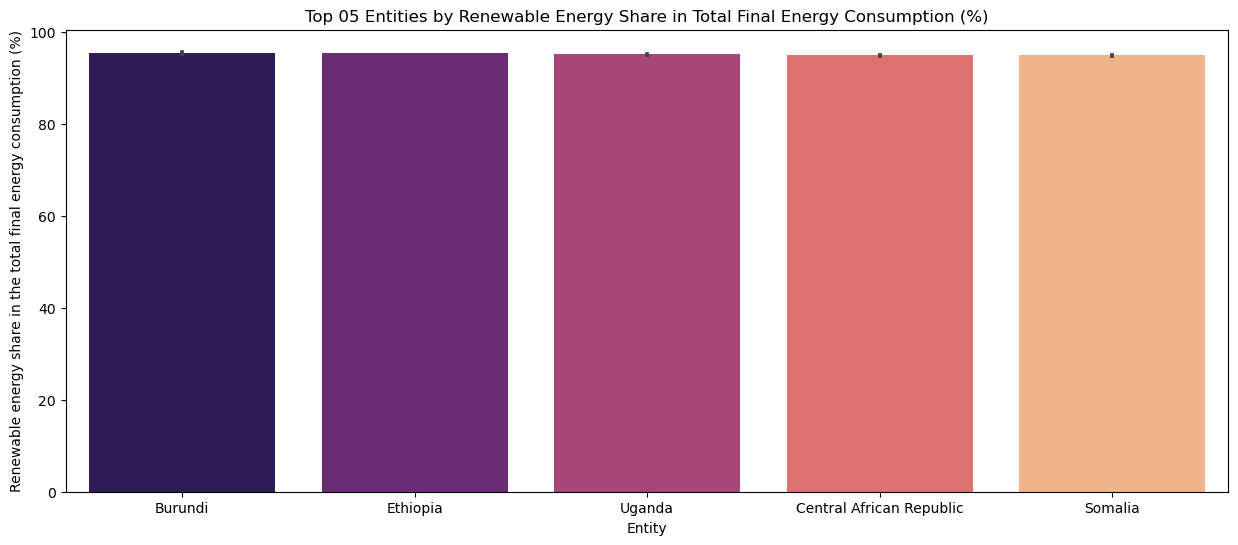

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(data=data.nlargest(5,'Renewable energy share in the total final energy consumption (%)'),
    x="Entity",
    y="Renewable energy share in the total final energy consumption (%)",palette="magma")
plt.title("Top 05 Entities by Renewable Energy Share in Total Final Energy Consumption (%)")
plt.show()

Text(0.5, 1.0, 'CORRELATION HEATMAP')

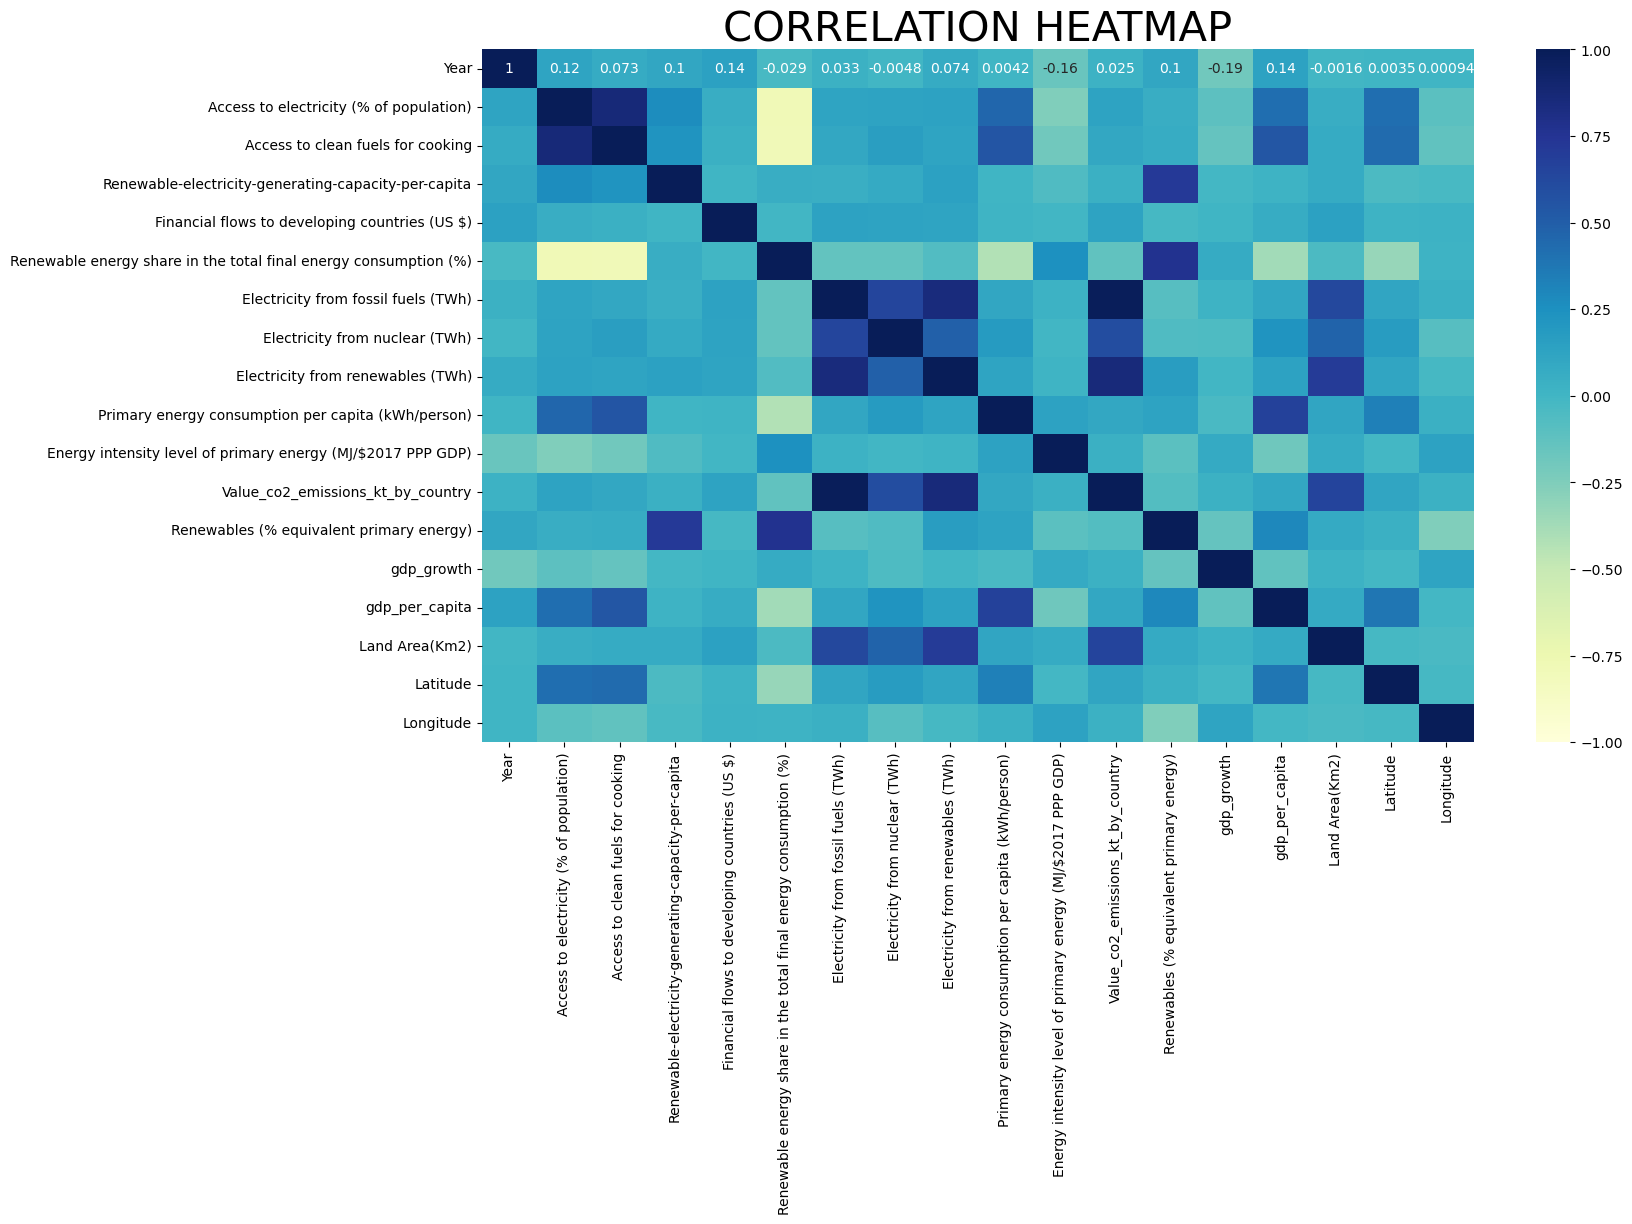

In [6]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(data[['Year','Access to electricity (% of population)','Access to clean fuels for cooking',	
                           'Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)',	
                           'Renewable energy share in the total final energy consumption (%)',
                           'Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)',
                           'Primary energy consumption per capita (kWh/person)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                           'Value_co2_emissions_kt_by_country','Renewables (% equivalent primary energy)','gdp_growth','gdp_per_capita',	
                           'Land Area(Km2)','Latitude','Longitude']].corr(), 
                            vmin=-1, vmax=1,annot=True,  cmap=sns.color_palette("YlGnBu", as_cmap=True))
heatmap.set_title('CORRELATION HEATMAP', fontdict={'fontsize':30})

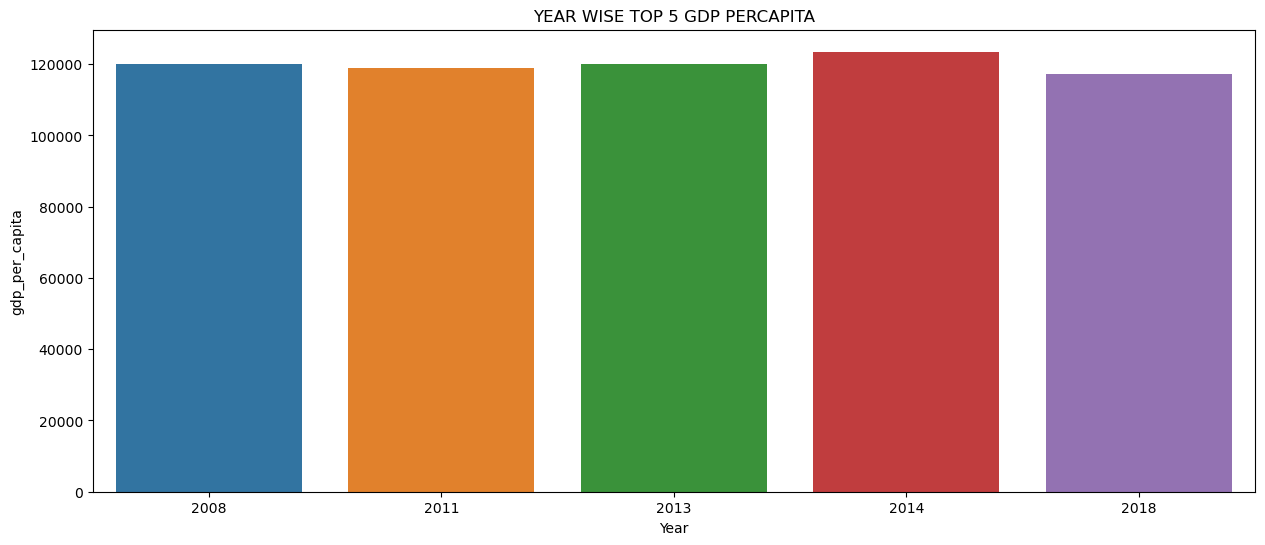

In [7]:
plt.figure(figsize=(15,6))
sns.barplot(data=data.nlargest(5,'gdp_per_capita'),x='Year',y='gdp_per_capita')
plt.title('YEAR WISE TOP 5 GDP PERCAPITA')
plt.show()

X AND Y 

In [14]:
x=data.drop("Renewable energy share in the total final energy consumption (%)",axis='columns')
x

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,0,2000,1.613591,6.2,9.22,20000.0,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,652230.0,33.939110,67.709953
1,0,2001,4.074574,7.2,8.86,130000.0,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,652230.0,33.939110,67.709953
2,0,2002,9.409158,8.2,8.47,3950000.0,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,652230.0,33.939110,67.709953
3,0,2003,14.738506,9.5,8.09,25970000.0,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,652230.0,33.939110,67.709953
4,0,2004,20.064968,10.9,7.75,94224000.0,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,175,2016,42.561730,29.8,62.88,30000.0,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,390757.0,-19.015438,29.154857
3645,175,2017,44.178635,29.8,62.33,5570000.0,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,390757.0,-19.015438,29.154857
3646,175,2018,45.572647,29.9,82.53,10000.0,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,390757.0,-19.015438,29.154857
3647,175,2019,46.781475,30.1,81.40,250000.0,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,390757.0,-19.015438,29.154857


In [15]:
y=data['Renewable energy share in the total final energy consumption (%)']
y

0       44.99
1       45.60
2       37.83
3       36.66
4       44.24
        ...  
3644    81.90
3645    82.46
3646    80.23
3647    81.50
3648    81.90
Name: Renewable energy share in the total final energy consumption (%), Length: 3649, dtype: float64

SPLITTING 

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [52]:
xtrain

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
2784,133,2018,100.000000,100.0,78.950000,94224000.0,0.21,0.00,0.01,4.545454,23219.2010,2.590000,1.598665e+05,11.986707,3.441610,13283.774348,261.0,17.357822,-62.782998
2988,143,2019,100.000000,100.0,84.470000,94224000.0,50.96,0.00,0.78,1.507538,158657.8900,2.570000,4.738000e+04,0.299543,1.345217,65640.707950,716.0,1.352083,103.819836
2718,130,2015,100.000000,100.0,16.360000,94224000.0,39.11,0.00,0.03,0.076648,245271.8300,6.320000,8.478000e+04,0.064864,4.753346,63039.112630,11586.0,25.354826,51.183884
2223,107,2003,8.100000,2.4,111.280000,4020000.0,0.05,0.00,10.78,99.538320,2005.1836,23.380000,1.900000e+03,11.986707,6.878533,326.075191,799380.0,-18.665695,35.529562
1284,62,2002,100.000000,100.0,113.137498,94224000.0,372.64,164.84,44.48,35.968105,49257.7900,3.970000,8.333800e+05,3.538632,-0.197974,25077.729080,357022.0,51.165691,10.451526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,53,2017,73.500000,50.6,150.270000,94224000.0,0.04,0.00,0.63,94.029850,5553.8486,4.440000,8.900000e+02,11.986707,2.026578,3914.418484,17364.0,-26.522503,31.465866
1294,62,2012,100.000000,100.0,113.137498,94224000.0,377.89,99.46,143.04,39.088314,46132.6700,3.290000,7.601300e+05,11.899699,0.418498,43858.363060,357022.0,51.165691,10.451526
860,40,2020,100.000000,93.8,105.790000,94224000.0,15.47,0.00,3.13,16.827957,9007.1810,5.307345,1.598665e+05,11.986707,-10.948341,9477.852873,110860.0,21.521757,-77.781167
3507,169,2005,100.000000,100.0,113.137498,94224000.0,2899.96,781.99,353.04,28.129686,90654.5300,6.040000,5.753490e+06,4.219231,3.513214,44114.747780,9833517.0,37.090240,-95.712891


In [53]:
ytrain

2784     1.600000
2988     0.840000
2718     0.050000
2223    92.730000
1284     4.410000
          ...    
1130    65.540000
1294    13.640000
860     32.638165
3507     5.840000
3174    26.190000
Name: Renewable energy share in the total final energy consumption (%), Length: 2919, dtype: float64

In [54]:
xtest

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
1406,67,2019,42.200000,1.6,29.880000,819800000.0,0.75,0.00,1.31,63.592236,1201.7898,5.570000,3950.000048,11.986707,5.646176,1058.143368,245857.0,9.945587,-9.696645
3598,173,2012,52.410000,60.0,0.060000,79630000.0,6.65,0.00,0.00,0.000000,2769.0400,2.790347,159866.462686,11.986707,3.441610,13283.774348,527968.0,15.552727,48.516388
3646,175,2018,45.572647,29.9,82.530000,10000.0,3.73,0.00,5.46,59.412407,3441.9858,9.830000,12380.000110,11.986707,4.824211,1254.642265,390757.0,-19.015438,29.154857
3230,156,2001,98.633100,40.0,642.720000,94224000.0,0.17,0.00,14.06,98.805340,9605.3660,9.840000,2150.000000,11.986707,9.580836,171.048065,144100.0,38.861034,71.276093
3114,150,2011,100.000000,100.0,113.137498,94224000.0,146.12,57.72,87.53,49.850708,35901.0700,3.040000,274399.993900,15.473434,-0.814373,31636.446310,505370.0,40.463667,-3.749220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,16,2007,100.000000,100.0,113.137498,94224000.0,34.84,48.23,3.49,59.750465,71662.3400,4.560000,104589.996300,1.415252,3.676881,44262.896000,30528.0,50.503887,4.469936
1584,76,2008,97.971436,92.6,80.070000,80000.0,31.35,0.00,3.45,9.913794,11838.8800,4.930000,88139.999390,2.381868,8.228107,4636.639325,438317.0,33.223191,43.679291
3451,166,2012,99.867490,94.7,113.137498,94224000.0,96.99,90.14,11.23,51.104053,31779.5470,8.980000,277109.985400,2.138865,0.152315,4004.804396,603550.0,48.379433,31.165580
678,32,2006,5.196557,2.4,0.190000,94224000.0,0.12,0.00,0.01,7.692308,107.3414,4.400000,509.999991,11.986707,0.648262,710.396399,1284000.0,15.454166,18.732207


In [55]:
ytest

1406    65.44
3598     1.08
3646    80.23
3230    64.07
3114    14.79
        ...  
343      3.34
1584     1.15
3451     2.86
678     83.74
1791     0.00
Name: Renewable energy share in the total final energy consumption (%), Length: 730, dtype: float64

ALGORITHMS

LINEAR REGRESSION

In [56]:
model1=LinearRegression()
model1.fit(xtrain,ytrain)
model1.predict(xtest)
model1.score(xtrain,ytrain)

0.792658479116943

In [57]:
model1.score(xtest,ytest)

0.788688982112189

DECISION TREE

In [60]:
model2 = DecisionTreeRegressor()
model2.fit(xtrain, ytrain)
model2.predict(xtest)
model2.score(xtrain, ytrain)

1.0

In [61]:
model2.score(xtest,ytest)

0.967525247548864

RANDOM FOREST

In [67]:
model3=RandomForestRegressor()
model3.fit(xtrain, ytrain)
model3.predict(xtest)
model3.score(xtrain, ytrain)

0.9982341001469341

In [68]:
model3.score(xtest,ytest)

0.9850191569498035

KNEIGHBORS

In [69]:
model4=KNeighborsRegressor()
model4.fit(xtrain,ytrain)
model4.predict(xtest)
model4.score(xtrain,ytrain)

0.680914862867814

In [70]:
model4.score(xtest,ytest)

0.5360107278534133

USER INPUT

In [75]:
Entity=input("enter the Entity")
Entity=le1.transform([Entity]) 

enter the Entity Afghanistan


In [26]:
Year=int(input('enter the year'))

enter the year 2024


In [28]:
Accesstoelectricity=float(input('enter a number'))

enter a number 1.613591


In [29]:
Accesstocleanfuelsforcooking=float(input('enter a number'))

enter a number 6.2


In [30]:
Renewableelectricitygeneratingcapacitypercapita=float(input('enter a number'))

enter a number 9.22


In [31]:
financial_flows_to_developing_countries = float(input('Enter a number: '))

Enter a number:  20000


In [32]:
renewable_energy_share_in_total_final_energy_consumption = float(input('Enter a number: '))

Enter a number:  44.99


In [33]:
electricity_from_fossil_fuels_TWh = float(input('Enter a number: '))

Enter a number:  0.16


In [34]:
electricity_from_nuclear_TWh = float(input('Enter a number: '))

Enter a number:  0.0


In [35]:
electricity_from_renewables_TWh = float(input('Enter a number: '))

Enter a number:  0.31


In [36]:
low_carbon_electricity_percentage = float(input('Enter a number: '))

Enter a number:  65.957440


In [37]:
primary_energy_consumption_per_capita_kWh_per_person = float(input('Enter a number: '))

Enter a number:  302.59482


In [38]:
energy_intensity_level_of_primary_energy_MJ_per_2017_PPP_GDP = float(input('Enter a number: '))

Enter a number:  1.64


In [39]:
Value_co2_emissions_kt_by_country = float(input('Enter a number: '))

Enter a number:  760.000000


In [40]:
renewables_percent_equivalent_primary_energy = float(input('Enter a number: '))

Enter a number:   11.986707


In [41]:
gdp_growth = float(input('Enter a number: '))

Enter a number:  3.441610


In [42]:
gdp_per_capita = float(input('Enter a number: '))

Enter a number:  13283.774348


In [43]:
land_area_km2 = float(input('Enter a number: '))

Enter a number:  652230.0


In [44]:
Latitude = float(input('Enter a number: '))

Enter a number:  33.939110


In [45]:
Longitude = float(input('Enter a number: '))

Enter a number:  67.709953


PREDICTION

In [73]:
print(model3.predict([[Entity[0],Year,Accesstoelectricity,Accesstocleanfuelsforcooking,Renewableelectricitygeneratingcapacitypercapita,financial_flows_to_developing_countries,electricity_from_fossil_fuels_TWh,electricity_from_nuclear_TWh,electricity_from_renewables_TWh,low_carbon_electricity_percentage,primary_energy_consumption_per_capita_kWh_per_person,energy_intensity_level_of_primary_energy_MJ_per_2017_PPP_GDP,Value_co2_emissions_kt_by_country,renewables_percent_equivalent_primary_energy ,gdp_growth,gdp_per_capita,land_area_km2,Latitude,Longitude]]))

[38.84979444]
